In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [19]:
print(tf.__version__)

1.9.0


In [20]:
n_features = 10
num_neurons = 5

In [21]:
x = tf.placeholder(tf.float32, shape= (None,n_features))
w = tf.Variable(tf.random_normal([n_features , num_neurons]))
b = tf.Variable(tf.ones([num_neurons]))

In [22]:
xw = tf.matmul(x,w)
z = tf.add(xw,b)

In [23]:
a = tf.tanh(z)

In [24]:
inp_data = np.ones((1,n_features))

In [25]:
init = tf.global_variables_initializer()

In [26]:
with tf.Session() as sess:
    sess.run(init)
    w_val = sess.run(w)
    ans = sess.run(a , feed_dict = {x:inp_data})

In [27]:
ans

array([[-0.54532206,  0.22956769,  0.9999336 ,  0.16387993, -0.99995106]],
      dtype=float32)

## Finding slope and intercept using NN

In [28]:
x_inp = np.linspace(1,10,10) + np.random.uniform(-1,1,10)

In [31]:
y = np.linspace(1,10,10) + np.random.uniform(-1,1,10)

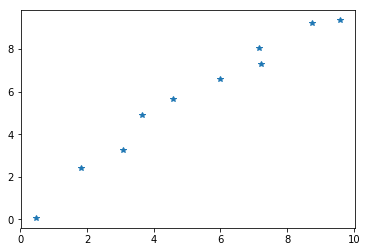

In [75]:
plt.plot(x_inp,y,'*')
plt.show()

## y = mx + b

In [39]:
m = tf.Variable(np.random.rand(1))
b = tf.Variable(np.random.rand(1))

In [41]:
err = 0
for x,y_true in zip(x_inp,y):
    y_pred = m*x + b
    err = err + (y_true - y_pred)**2

In [43]:
opt = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [44]:
train = opt.minimize(err)

In [77]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    step = 100
    
    for i in range(step):
        
        sess.run(train)
        
    final_m , final_b = sess.run([m,b])
        

In [78]:
x_test = np.linspace(-1,11,10)

In [79]:
y_test = final_m*x_test + final_b

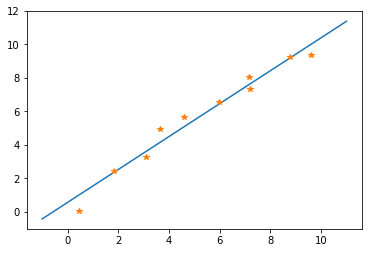

In [80]:
plt.plot(x_test,y_test)
plt.plot(x_inp,y,'*')
plt.show()